In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
warnings.filterwarnings('ignore')

In [2]:
file_path="D:\\MACHINE LEARNING\\RECOMMANDATION ENGINE\\projects\\datasets\\fashion_products.csv"
f_p_df=pd.read_csv(file_path)

In [3]:
f_p_df

,User ID,Product ID,Product Name,Brand,Category,Price,Rating,Color,Size
0,19,1,Dress,Adidas,Men's Fashion,40,1.043159,Black,XL
1,97,2,Shoes,H&M,Women's Fashion,82,4.026416,Black,L
2,25,3,Dress,Adidas,Women's Fashion,44,3.337938,Yellow,XL
3,57,4,Shoes,Zara,Men's Fashion,23,1.049523,White,S
4,79,5,T-shirt,Adidas,Men's Fashion,79,4.302773,Black,M
...,...,...,...,...,...,...,...,...,...
995,20,996,Shoes,Zara,Women's Fashion,55,1.620081,Black,M
996,42,997,Sweater,Nike,Kids' Fashion,13,1.544464,Green,L
997,9,998,Sweater,Zara,Men's Fashion,47,3.961913,White,L
998,8,999,T-shirt,Zara,Women's Fashion,68,3.089722,Blue,S


In [4]:
#basics checks

In [5]:
f_p_df.size

9000

In [6]:
f_p_df.shape

(1000, 9)

In [7]:
f_p_df.head()

,User ID,Product ID,Product Name,Brand,Category,Price,Rating,Color,Size
0,19,1,Dress,Adidas,Men's Fashion,40,1.043159,Black,XL
1,97,2,Shoes,H&M,Women's Fashion,82,4.026416,Black,L
2,25,3,Dress,Adidas,Women's Fashion,44,3.337938,Yellow,XL
3,57,4,Shoes,Zara,Men's Fashion,23,1.049523,White,S
4,79,5,T-shirt,Adidas,Men's Fashion,79,4.302773,Black,M


In [8]:
f_p_df.columns

Index(['User ID', 'Product ID', 'Product Name', 'Brand', 'Category', 'Price',
       'Rating', 'Color', 'Size'],
      dtype='object')

In [9]:
f_p_df.dtypes

User ID           int64
Product ID        int64
Product Name     object
Brand            object
Category         object
Price             int64
Rating          float64
Color            object
Size             object
dtype: object

In [10]:
f_p_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   User ID       1000 non-null   int64  
 1   Product ID    1000 non-null   int64  
 2   Product Name  1000 non-null   object 
 3   Brand         1000 non-null   object 
 4   Category      1000 non-null   object 
 5   Price         1000 non-null   int64  
 6   Rating        1000 non-null   float64
 7   Color         1000 non-null   object 
 8   Size          1000 non-null   object 
dtypes: float64(1), int64(3), object(5)
memory usage: 70.4+ KB


In [11]:
f_p_df.isnull().sum()

User ID         0
Product ID      0
Product Name    0
Brand           0
Category        0
Price           0
Rating          0
Color           0
Size            0
dtype: int64

**EDA**

**seperation of categorical and numerical**

In [12]:
categorical_columns=[]
numerical_columns=[]
for i,j in dict(f_p_df.dtypes).items():
    if j=="O":
        categorical_columns.append(i)
    else:
        numerical_columns.append(i)


In [13]:
categorical_columns

['Product Name', 'Brand', 'Category', 'Color', 'Size']

In [14]:
numerical_columns

['User ID', 'Product ID', 'Price', 'Rating']

**categorical columns**

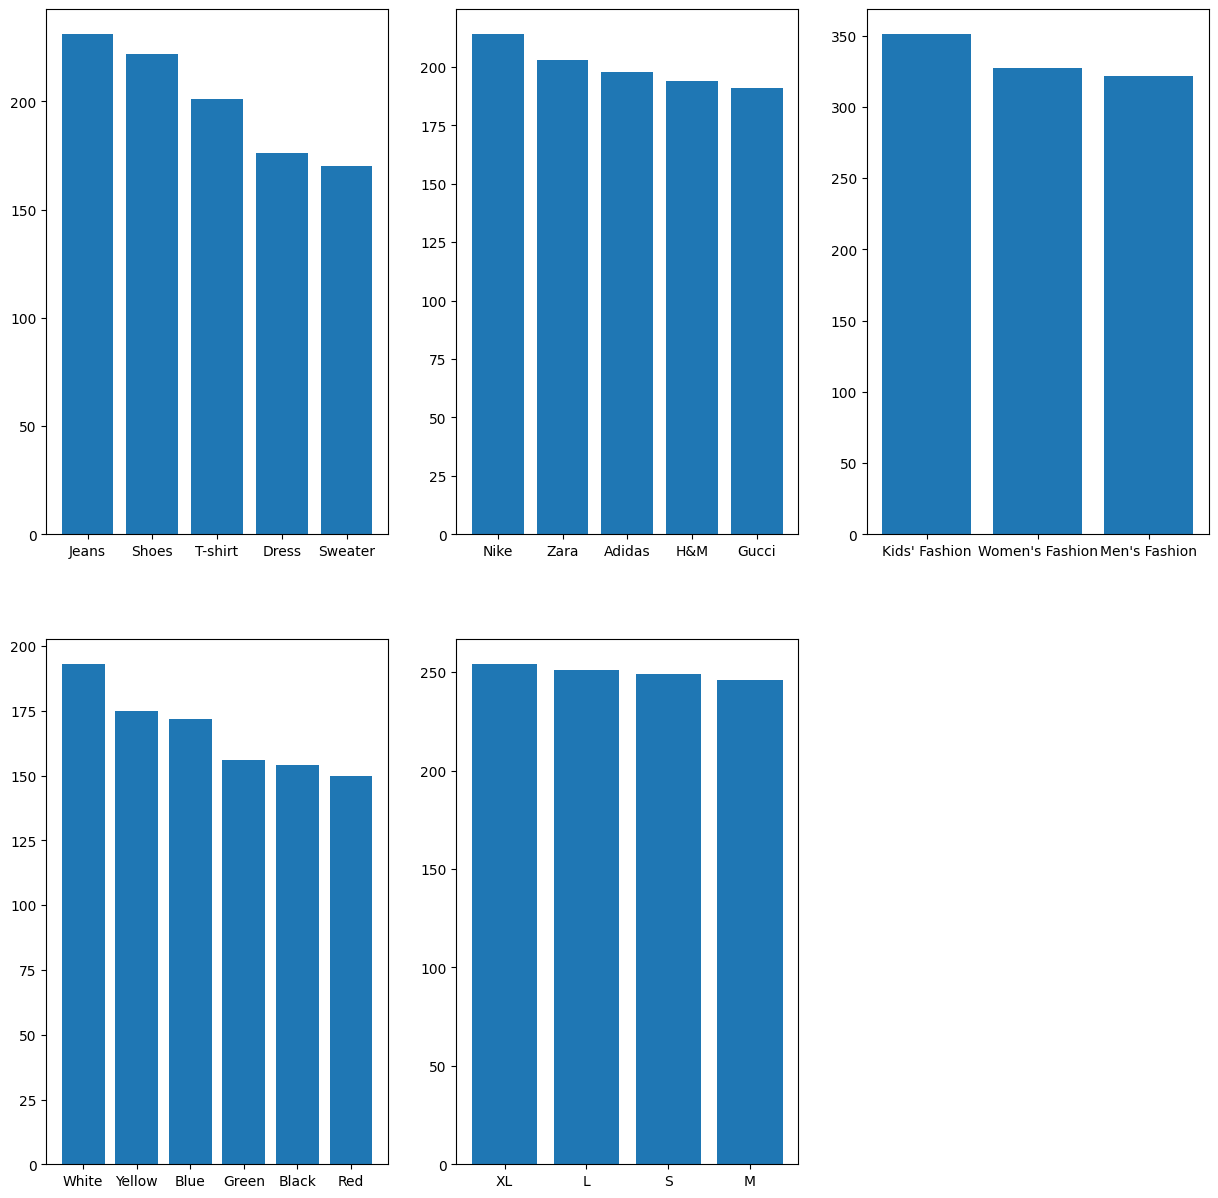

In [15]:
plt.figure(figsize=(15,15))
for index,i in enumerate(categorical_columns):
    plt.subplot(2,3,index+1)
    data=f_p_df[i].value_counts()
    keys=f_p_df[i].value_counts().keys()
    values=f_p_df[i].value_counts().values
    plt.bar(keys,values)

In [16]:
f_p_df.describe()

,User ID,Product ID,Price,Rating
count,1000.00000,1000.000000,1000.000000,1000.000000
mean,50.41900,500.500000,55.785000,2.993135
std,28.78131,288.819436,26.291748,1.153185
min,1.00000,1.000000,10.000000,1.000967
25%,26.00000,250.750000,33.000000,1.992786
50%,50.00000,500.500000,57.000000,2.984003
75%,75.00000,750.250000,78.250000,3.985084
max,100.00000,1000.000000,100.000000,4.987964


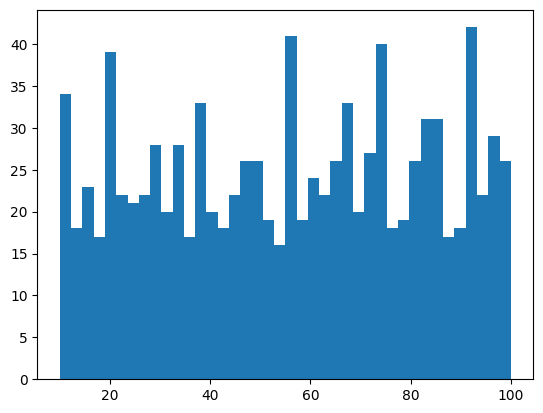

In [17]:
plt.hist(f_p_df['Price'],bins=40)
plt.show()

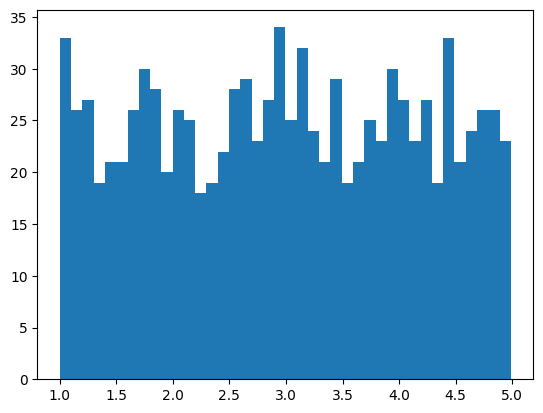

In [18]:
plt.hist(f_p_df['Rating'],bins=40)
plt.show()

In [19]:

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import linear_kernel


In [20]:
content_df = f_p_df[['Product ID', 'Product Name', 'Brand', 
                   'Category', 'Color', 'Size']]
content_df['Content'] = content_df.apply(lambda row: ' '.join(row.dropna().astype(str)), axis=1)

tfidf_vectorizer = TfidfVectorizer()
content_matrix = tfidf_vectorizer.fit_transform(content_df['Content'])

content_similarity = linear_kernel(content_matrix, content_matrix)



def get_content_based_recommendations(product_id, top_n):
    index = content_df[content_df['Product ID'] == product_id].index[0]
    similarity_scores = content_similarity[index]
    similar_indices = similarity_scores.argsort()[::-1][1:top_n + 1]
    recommendations = content_df.loc[similar_indices, 'Product ID'].values
    return recommendations

In [23]:

product_id = 1
top_n = 10
recommendations = get_content_based_recommendations( product_id, top_n)

print(f"content Recommendations based on Product {product_id}:")
for i, recommendation in enumerate(recommendations):
    print(f"{i + 1}. Product ID: {recommendation}")
    print(f"{i + 1}. Product ID: {recommendation}")

content Recommendations based on Product 1:
1. Product ID: 5
1. Product ID: 5
2. Product ID: 6
2. Product ID: 6
3. Product ID: 3
3. Product ID: 3
4. Product ID: 829
4. Product ID: 829
5. Product ID: 489
5. Product ID: 489
6. Product ID: 756
6. Product ID: 756
7. Product ID: 441
7. Product ID: 441
8. Product ID: 459
8. Product ID: 459
9. Product ID: 295
9. Product ID: 295
10. Product ID: 209
10. Product ID: 209
